# 데이터 분석 및 전처리

## 데이터 불러오기 및 분석하기


* 데이터크기

In [1]:
import zipfile

In [2]:
DATA_IN_PATH='./data_in/'

In [3]:
file_list=['labeledTrainData.tsv.zip','testData.tsv.zip','unlabeledTrainData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH+file,'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# quoting : 0(default) : 인용구 관련, '',""는 읽지 않고 내부값만 출력 3: '',""를 출력
train_data = pd.read_csv(DATA_IN_PATH+'labeledTrainData.tsv',header=0,delimiter='\t',quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [12]:
print("파일크기:")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2)) +'MB')

파일크기:
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


* 데이터의 개수

In [13]:
print('전체 학습데이터의 개수 :{}'.format(len(train_data)))

전체 학습데이터의 개수 :25000


* 각 리뷰의 문자 길이 분포

In [17]:
train_length = train_data['review'].apply(len)
train_length

0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of review')

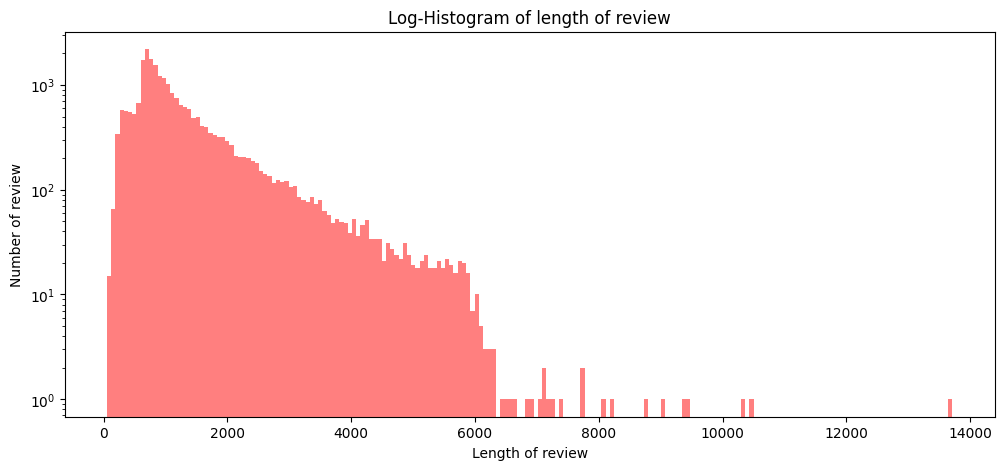

In [19]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log',nonpositive='clip')

plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [20]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2530d5f88e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2530d5f8e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2530d5f8640>],
 'medians': [<matplotlib.lines.Line2D at 0x2530d5f9360>],
 'fliers': [<matplotlib.lines.Line2D at 0x2530d5f98a0>],
 'means': [<matplotlib.lines.Line2D at 0x2530d5f9600>]}

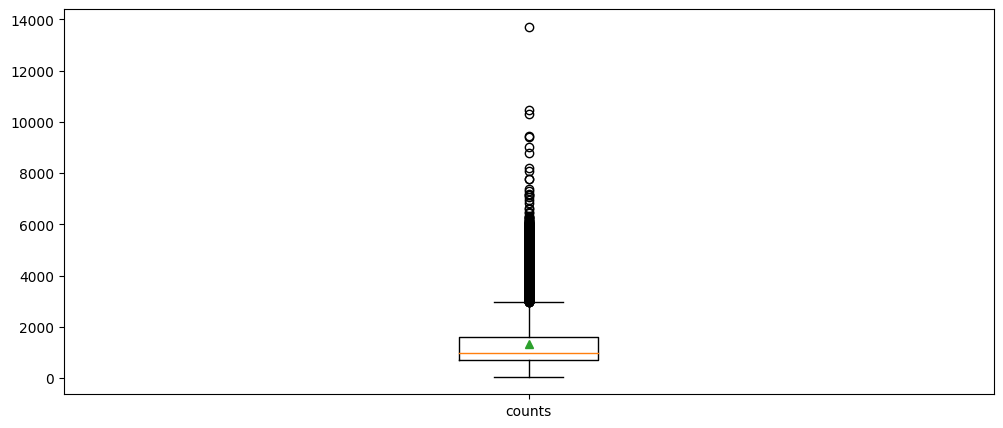

In [22]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans='True')

* 많이 사용된 단어

(-0.5, 799.5, 599.5, -0.5)

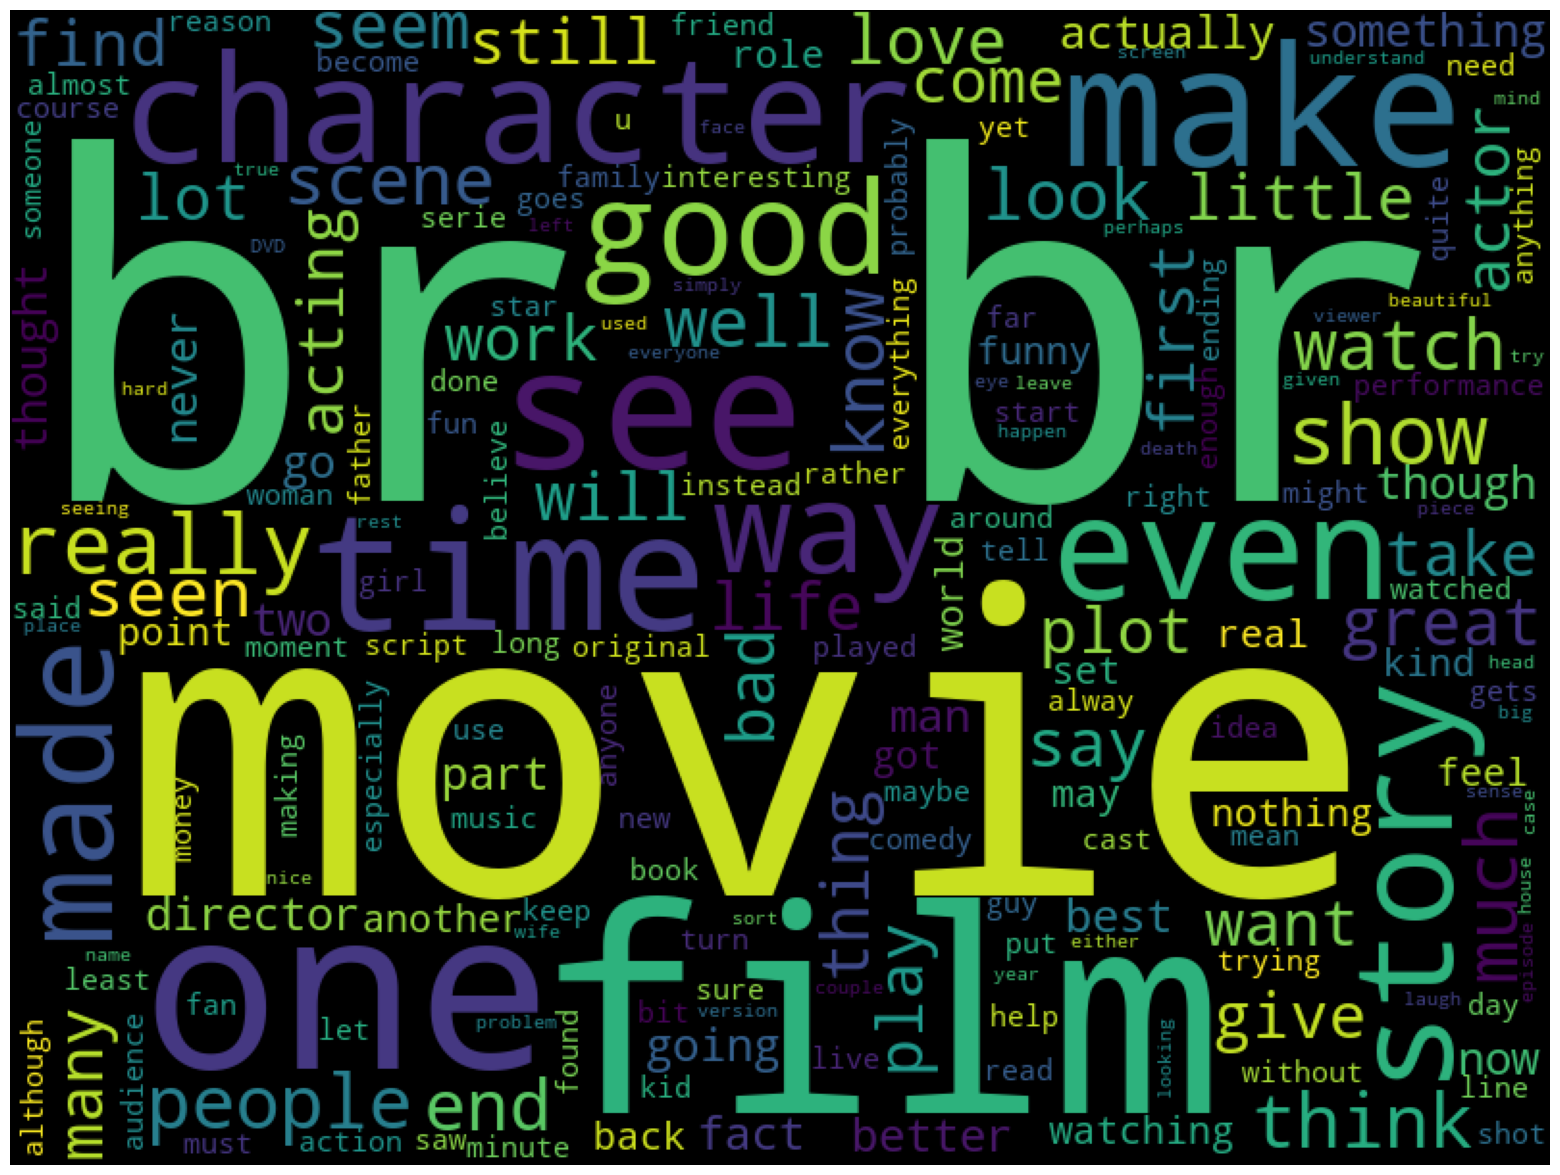

In [25]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

* 긍, 부정 데이터의 분포

<AxesSubplot: xlabel='sentiment', ylabel='count'>

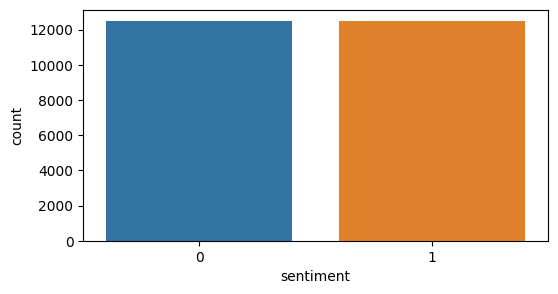

In [32]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['sentiment'])

In [33]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


* 각 리뷰의 단어 개수 분포

In [39]:
train_word_counts = train_data['review'].apply(lambda x : len(x.split(' ')))
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of reviews')

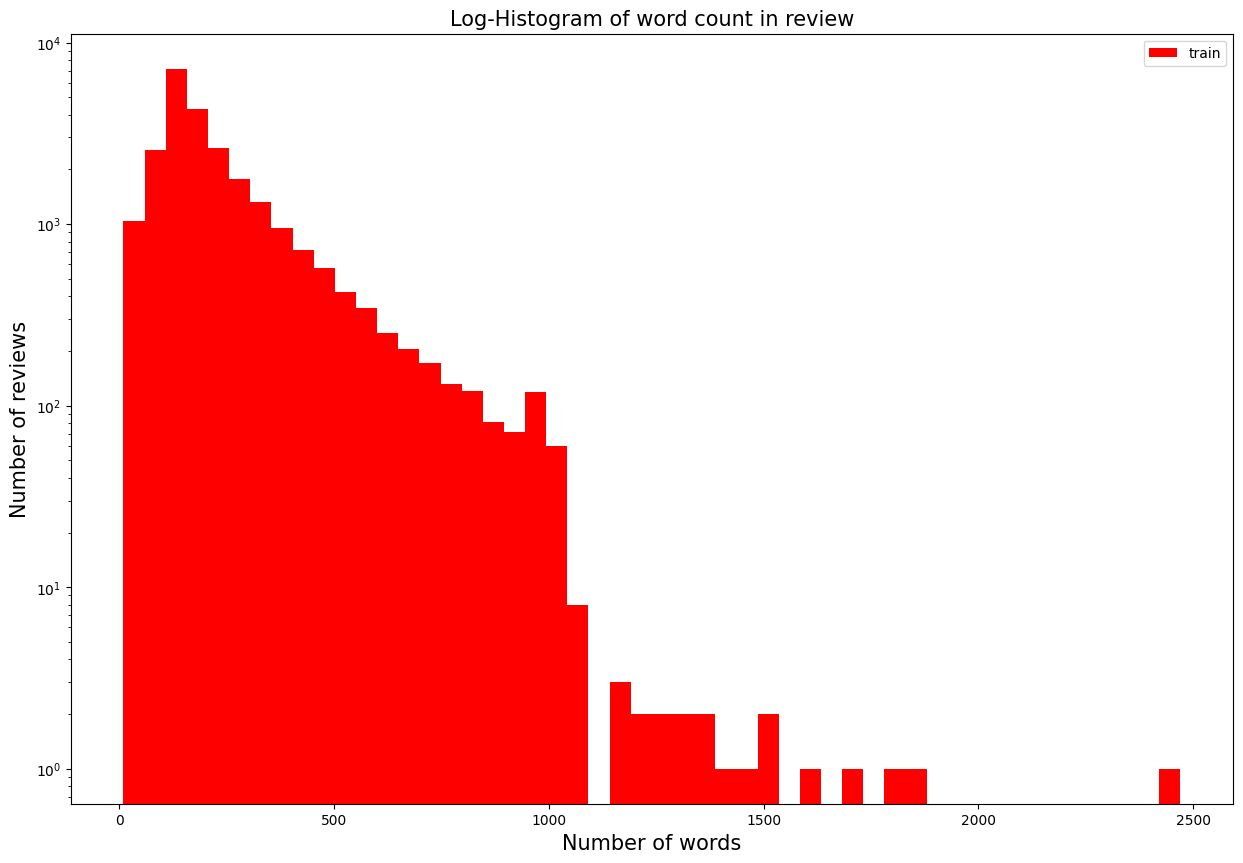

In [40]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [41]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


* 특수문자 및 대, 소문자 비율

In [43]:
qmarks = np.mean(train_data['review'].apply(lambda x : '?' in x))
print('물음표가 있는 질문: {:.2f}%'.format(qmarks*100))

fullstop = np.mean(train_data['review'].apply(lambda x : '.' in x))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop*100))

capital_first = np.mean(train_data['review'].apply(lambda x : max([y.isupper() for y in x])))
print('대문자가 있는 질문: {:.2f}%'.format(capital_first*100))

numbers = np.mean(train_data['review'].apply(lambda x : max([y.isdigit() for y in x])))
print('숫자가 있는 질문: {:.2f}%'.format(numbers*100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


#### 데이터 전처리

In [44]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [46]:
DATA_IN_PATH='./data_in/'

train_data = pd.read_csv(DATA_IN_PATH+'labeledTrainData.tsv',header=0,delimiter='\t',quoting=3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [53]:
review = train_data['review'][0]
review_text = BeautifulSoup(review,"html.parser").get_text() # HTML 태그 제거
# 영어 문자를 제외한 나머지는 모두 공백 처리
review_text = re.sub("[^a-zA-Z]"," ",review_text)
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

#### 불용어 처리

In [55]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower()
words = review_text.split()
words =[w for w in words if not w in stop_words]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [56]:
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [64]:
# 데이터 전처리 함수

def preprocessing(review, remove_stopwords=False):
    review_text = BeautifulSoup(review,"html.parser").get_text()
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    words = review_text.lower().split()

    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]


    clean_review = ' '.join(words)
    
    return clean_review

In [65]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))

c:\Users\seon\.conda\envs\study\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [66]:
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [67]:
clean_train_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment':train_data['sentiment']})

In [68]:
clean_train_df

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0


In [69]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [70]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [82]:
word_vocab = tokenizer.word_index
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [84]:
word_vocab["<PAD>"] = 0

In [73]:
data_configs={}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [80]:
text_sequences

[[404,
  70,
  419,
  8815,
  506,
  2456,
  115,
  54,
  873,
  516,
  178,
  18686,
  178,
  11242,
  165,
  78,
  14,
  662,
  2457,
  117,
  92,
  10,
  499,
  4074,
  165,
  22,
  210,
  581,
  2333,
  1194,
  11242,
  71,
  4826,
  71,
  635,
  2,
  253,
  70,
  11,
  302,
  1663,
  486,
  1144,
  3265,
  8815,
  411,
  793,
  3342,
  17,
  441,
  600,
  1500,
  15,
  4424,
  1851,
  998,
  146,
  342,
  1442,
  743,
  2424,
  4,
  8815,
  418,
  70,
  637,
  69,
  237,
  94,
  541,
  8815,
  26055,
  26056,
  120,
  1,
  8815,
  323,
  8,
  47,
  20,
  323,
  167,
  10,
  207,
  633,
  635,
  2,
  116,
  291,
  382,
  121,
  15535,
  3315,
  1501,
  574,
  734,
  10013,
  923,
  11578,
  822,
  1239,
  1408,
  360,
  8815,
  221,
  15,
  576,
  8815,
  22224,
  2274,
  13426,
  734,
  10013,
  27,
  28606,
  340,
  16,
  41,
  18687,
  1500,
  388,
  11243,
  165,
  3962,
  8815,
  115,
  627,
  499,
  79,
  4,
  8815,
  1430,
  380,
  2163,
  114,
  1919,
  2503,
  574,
  17,
 

In [90]:
MAX_SEQUENCE_LENGTH = 174

train_inputs = pad_sequences(text_sequences,maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data:', train_input.shape)

Shape of train data: (25000, 174)


In [91]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor',train_labels)

Shape of label tensor [1 1 0 ... 0 0 1]


![alt text](./data_in/img1.png)

In [92]:
TRAIN_INPUT_DATA = 'train_input.npy' # 벡터화한 데이터(numpy file)
TRAIN_LABEL_DATA = 'train_label.npy' # 정답 레이블 (numpy file)
TRAIN_CLEAN_DATA = 'train_clean.csv'  # 정제된 텍스트 데이터 (csv file)
DATA_CONFIGS = 'data_configs.json' # 정답 레이블 (json file)
import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [93]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)
# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'),\
          ensure_ascii=False)  # ensure_ascii=False : 유니코드가 포함됨

In [104]:
test_data = pd.read_csv(DATA_IN_PATH + 'testData.tsv',header=0,delimiter='\t',quoting=3)

# Mission
# 1. preprocessing
clean_test_reviews=[]
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))
# 2. Dataframe 만들기
clean_test_df = pd.DataFrame({'review':clean_test_reviews,'id':test_data['id']})
test_id = np.array(test_data['id'])
# 3. texts_to_sequences & 4. pad_sequences
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')


c:\Users\seon\.conda\envs\study\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [106]:
TEST_INPUT_DATA ='test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)